## Кутдусов Руслан

### Задача 2.1.

Методом простой итерации найти вещественные корни алгебраического уравнения $ P(x) = 0 $ 
с точностью $ \varepsilon = 10^{-8} $ .


2.1.21 $ P(x) = 1.3x^3 + 3x^2 - 2.3x - 5.2$ 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def P(x):
    return 1.3*x**3 + 3*x**2 - 2.3*x - 5.2
def dP(x):
    return 3.9*x**2 + 6*x - 2.3

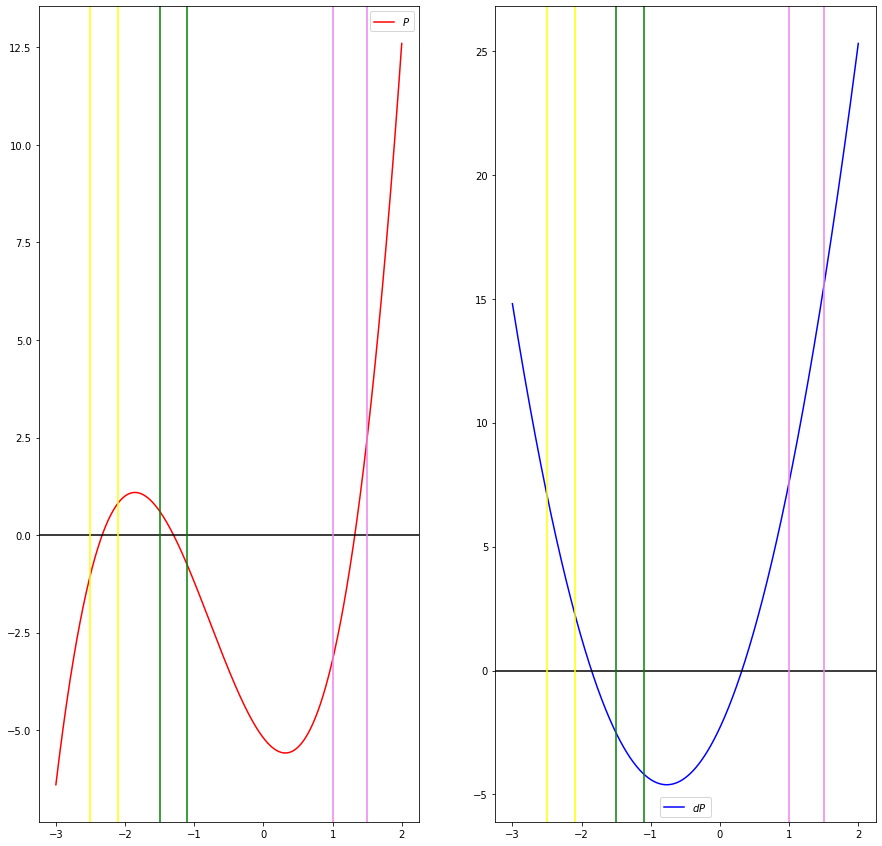

In [3]:
x_data = np.linspace(-3, 2, 1000)

fig, axs = plt.subplots(1, 2, figsize = (15, 15))

axs[0].plot(x_data, P(x_data), label = '$P$', color = 'red')
axs[1].plot(x_data, dP(x_data), label = '$dP$', color = 'blue')

axs[0].legend()
axs[1].legend()

axs[0].axhline(y = 0, color = 'k')
axs[1].axhline(y = 0, color = 'k')

axs[0].axvline(x = 1.5, color = 'violet')
axs[0].axvline(x = 1, color = 'violet')
axs[0].axvline(x = -1.1, color = 'green')
axs[0].axvline(x = -1.5, color = 'green')
axs[0].axvline(x = -2.1, color = 'yellow')
axs[0].axvline(x = -2.5, color = 'yellow')

axs[1].axvline(x = 1.5, color = 'violet')
axs[1].axvline(x = 1, color = 'violet')
axs[1].axvline(x = -1.1, color = 'green')
axs[1].axvline(x = -1.5, color = 'green')
axs[1].axvline(x = -2.1,color = 'yellow')
axs[1].axvline(x = -2.5, color = 'yellow')

Все корни простые.

С помощью графиков определили отрезки локализации корней уравнения $ P(x) = 0$: $[-2.5, -2.1], [-1.5, -1.1] и [1, 1.5]$.
На отрезках 
локализации производная функции сохраняет постоянный знак. Определим итерационные параметр $ \alpha $ и параметр $q $ для каждого корня.

$M_1 = \underset{[-2.5, -2.1]}{max}P'(-2.5)|$
$m_1 = \underset{[-2.5, -2.1]}{min}P'(-2.1)|$
$M_2 = \underset{[-1.5, -1.1]}{max}P'(-1.1)|$
$m_2 = \underset{[-1.5, -1.1]}{min}P'(-1.5)|$
$M_3 = \underset{[1, 1.5]}{max}P'(1.5)|$
$m_3 = \underset{[1, 1.5]}{min}P'(1)|$
$\alpha_1 = \frac{2}{M_1 + m_1}|$
$\alpha_2 = \frac{2}{M_2 + m_2}|$
$\alpha_3 = \frac{2}{M_3 + m_3}|$
$q_1 = \left|\frac{M_1 - m_1}{M_1 + m_1}\right||$
$q_2 = \left|\frac{M_2 - m_2}{M_2 + m_2}\right||$
$q_3 = \left|\frac{M_3 - m_3}{M_3 + m_3}\right|$

In [4]:
mx1 = dP(-2.5)
mn1 = dP(-2.1)
mn2 = dP(-1.1)
mx2 = dP(-1.5)
mx3 = dP(1.5)
mn3 = dP(1)

In [5]:
print(mx1, mn1, mx2, mn2, mx3, mn3)

7.075 2.2990000000000004 -2.5249999999999995 -4.181 15.474999999999998 7.6000000000000005


In [6]:
alp1 = 2 / (mx1 + mn1)
alp2 = 2 / (mx2 + mn2) 
alp3 = 2 / (mx3 + mn3)
q1 = np.abs((mx1 - mn1) / (mx1 + mn1))
q2 = np.abs((mx2 - mn2) / (mx2 + mn2))
q3 = np.abs((mx3 - mn3) / (mx3 + mn3))

In [7]:
print(alp1, alp2, alp3, q1, q2, q3)

0.21335609131640706 -0.29824038174768863 0.0866738894907909 0.50949434606358 0.2469430360870863 0.34127843986998907


Достаточное условие выполнено.

 Составим программу для нахождения корня с заданной точностью $\varepsilon$
по методу простой итерации. В 
качестве расчетной формулы используем метод простой итерации с параметром: 
$x_{n+1} = x_{n} - \alpha \cdot P(x_n)$

In [8]:
eps = 10 ** (-8)

In [9]:
def simple_iterations(x, a, q):
    eps1 = abs((1 - q) / q) * eps
    it = 1
    buffer_x = x - a * P(x)
    while abs(buffer_x - x) > eps1 :
        x = buffer_x
        buffer_x = x - a * P(x)
        it += 1
    return (it,x)

Для корня на отрезке $[-2.5, -2.1]$

In [10]:
simple_iterations((-2.5 - 2.1) / 2 , alp1, q1)

(6, -2.330319104027989)

In [11]:
x_1 = -2.33031910 #простой корень с заданной  точностью

Для корня на отрезке $[-1.5, -1.1]$

In [12]:
simple_iterations((-1.1 - 1.5) / 2, alp2, q2)

(5, -1.298889305248022)

In [13]:
x_2 = -1.29888931

Для корня на отрезке $[1, 1.5]$

In [14]:
simple_iterations((1 + 1.5) / 2 , alp3, q3)

(7, 1.3215160891154756)

In [15]:
x_3 = 1.32151609

In [16]:
import pandas as pd

In [19]:
frame = pd.read_csv('dataset11.tsv', header = 0, sep = '\t')

In [20]:
frame # таблица результатов

,Корни:,"[a, b]",M,m,a,q,Корень с заданнной точностью и число итераций
0,1-ый корень,"[-2.5, -2]",7.075,1.29(9),0.239,0.690,-2.33031910 ; 6
1,2-ой корень,"[-1.5, -1]",4.400,2.525,0.289,0.271,-1.29888931 ; 5
2,3-ий корень,"[1, 1.5]",15.475,7.600,0.087,0.341,1.32151609 ; 7


$\textbf{Отчёт по выполненной задаче}$: Корни с заданной точностью найдены.

## Задача 2.2

Дано уравнение 
$ f(x) = 0 $.
Найти все корни уравнения с заданной точностью
$ \varepsilon = 10^{-12} $
на отрезке [-2, 2]. Для решения задачи использовать метод Ньютона и метод секущих.

$ f(x) = 3 \cdot x^2 \cdot \sin{x^2} - \sin{2x} - 0.3 $

In [27]:
def f(x):
    return 3 * x**2 * np.sin(x**2) - np.sin(2*x) - 0.3

# для метода Ньютона потребуется производная
def df(x):
    return 6 * x * np.sin(x**2) + 6 * x**3 * np.cos(x**2) - 2 * np.cos(2 * x)

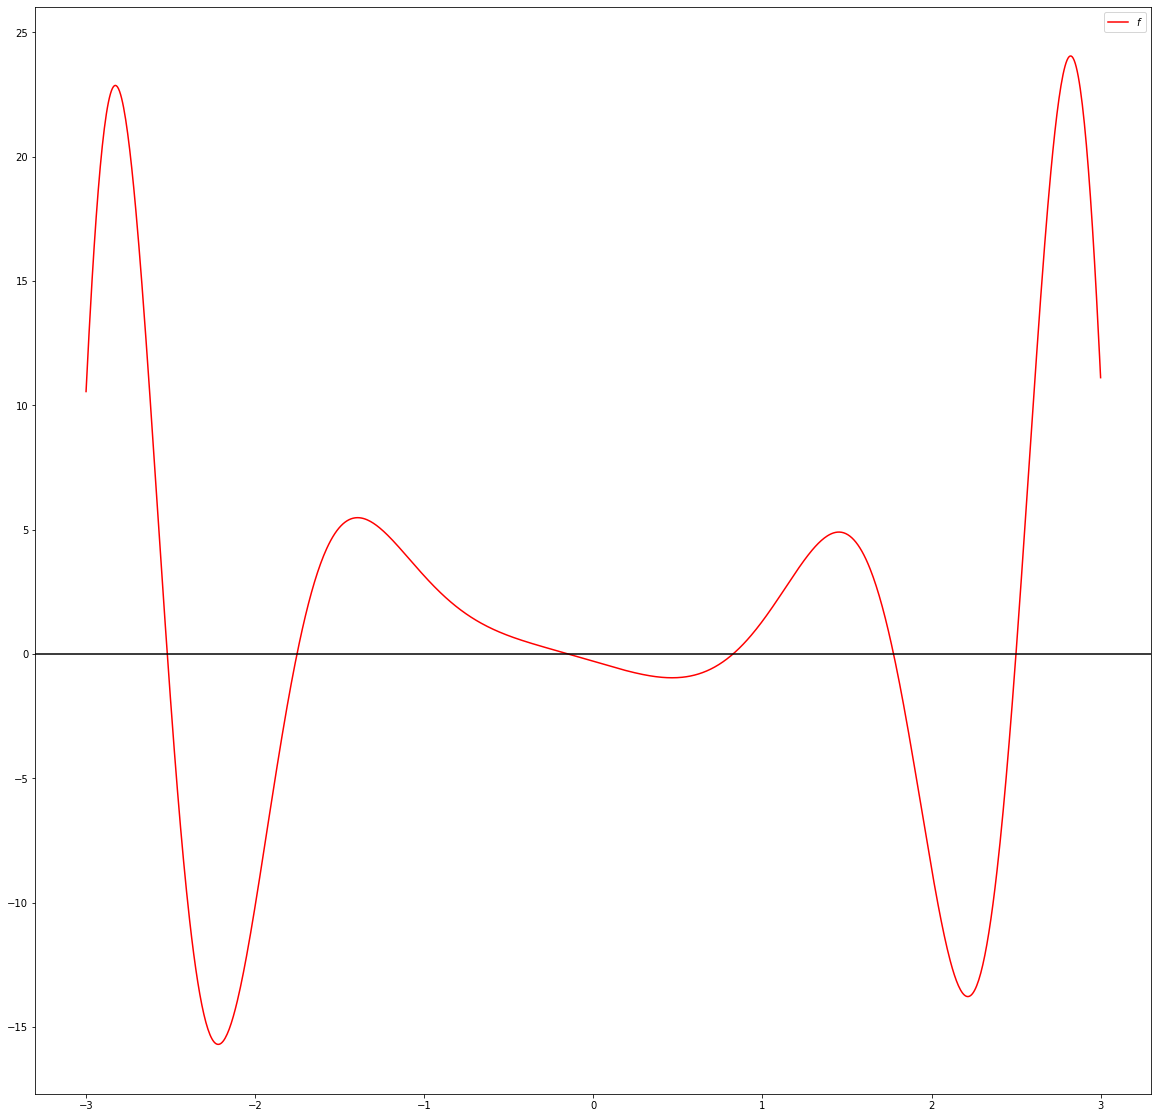

In [28]:
#построим интересующий нас график
x_data = np.linspace(-3, 3, 1000)

fig, axs = plt.subplots(1, 1, figsize = (20, 20))

axs.plot(x_data, f(x_data), label = '$f$', color = 'red')

axs.legend()

axs.axhline(y = 0, color = 'k')

In [29]:
# 6 отрезков локализации внутри [-2, 2]
loc = np.array([[-2, -1.5], [-0.5, 0], [0.5, 1], [1.5, 2]])

In [30]:
eps = 10 ** (-12)

In [31]:
def Newtone (local):
    i = 0 
    x0 = (local[0] + local[1]) / 2
    x1 = x0 - f(x0) / df(x0)
    while np.abs(x1 - x0) >= eps:
        x0 = x1
        x1 = x0 - f(x0) / df(x0)
        i += 1
    return [i, x1]

def Secant (local):
    i = 0
    x0 = local[1]
    x1 = (local[0] + local[1]) / 2
    while np.abs(x1 - x0) >= eps:
        tmp = x1
        x1 = x1 - ((x1 - x0) * f(x1)) / (f(x1) - f(x0))
        x0 = tmp
        i += 1
    return [i, x1]

for i in range(4):
    print("Newtone: ", Newtone(loc[i]))
    print("Secant: ", Secant(loc[i]))

Newtone:  [3, -1.7522620396378794]
Secant:  [5, -1.7522620396378794]
Newtone:  [3, -0.1515178608061512]
Secant:  [5, -0.15151786080615118]
Newtone:  [4, 0.8270223889640246]
Secant:  [7, 0.8270223889640246]
Newtone:  [4, 1.7753699757755748]
Secant:  [6, 1.7753699757755748]


In [32]:
import pandas as pd
frame = pd.read_csv('dataset12.tsv', header = 0, sep = '\t')
frame # таблица результатов

,Корни уравнения,Число итераций метода Ньютона,Число итераций метода секущих
0,-1.752262039638 .,3,5
1,-0.151517860806 .,3,5
2,0.827022388964 .,4,7
3,1.775369975776 .,4,6


$\textbf{Сравнение результатов}$: Корни с заданной точностью у методов одинаковые, значит методы работают. Также это говорит нам о том, что отрезки локализации отобраны правильно. Метод Ньютона с поиском корней справился чуть быстрее, чем метод секущих. Сходимость метода Ньютона является квадратичной, тогда как порядок сходимости метода секущих равен золотому сечению, что меньше 2-ух.

In [33]:
# модифицируем методы
def m_Newtone (local):
    r = []
    i = 0 
    x0 = (local[0] + local[1]) / 2
    x1 = x0 - f(x0) / df(x0)
    while np.abs(x1 - x0) >= eps:
        r.append(np.abs(f(x1)))
        x0 = x1
        x1 = x0 - f(x0) / df(x0)
        i += 1
    return (r, i) 

def m_Secant (local):
    r = []
    i = 0
    x0 = local[1]
    x1 = (local[0] + local[1]) / 2
    while np.abs(x1 - x0) >= eps:
        r.append(np.abs(f(x1)))
        tmp = x1
        x1 = x1 - ((x1 - x0) * f(x1)) / (f(x1) - f(x0))
        x0 = tmp
        i += 1
    return (r, i)

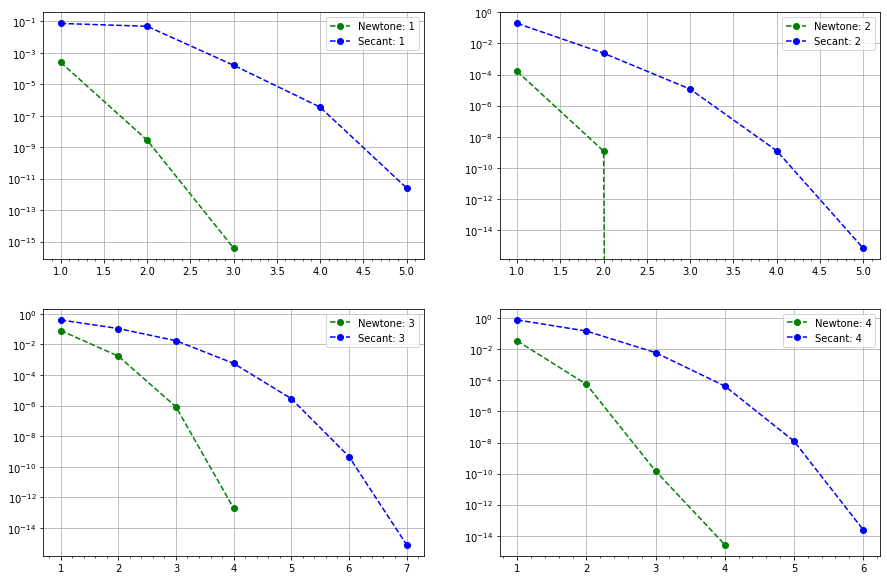

In [34]:
#построим графики зависимости значения модуля невязкости
fig, axs = plt.subplots(2, 2, figsize = (15, 10))

axs[0][0].plot(np.arange(m_Newtone(loc[0])[1]) + 1,
m_Newtone(loc[0])[0],'--ro', color = 'green', label = f'Newtone: 1')
axs[0][0].plot(np.arange(m_Secant(loc[0])[1]) + 1,
m_Secant(loc[0])[0],'--ro', color = 'blue', label = f'Secant: 1')
axs[0][0].minorticks_on()
axs[0][0].grid(True)
axs[0][0].legend()
axs[0][0].set_yscale('log')

axs[0][1].plot(np.arange(m_Newtone(loc[1])[1]) + 1,
m_Newtone(loc[1])[0],'--ro', color = 'green', label = f'Newtone: 2')
axs[0][1].plot(np.arange(m_Secant(loc[1])[1]) + 1,
m_Secant(loc[1])[0],'--ro', color = 'blue', label = f'Secant: 2')
axs[0][1].minorticks_on()
axs[0][1].grid(True)
axs[0][1].legend()
axs[0][1].set_yscale('log')

axs[1][0].plot(np.arange(m_Newtone(loc[2])[1]) + 1,
m_Newtone(loc[2])[0],'--ro', color = 'green', label = f'Newtone: 3')
axs[1][0].plot(np.arange(m_Secant(loc[2])[1]) + 1,
m_Secant(loc[2])[0],'--ro', color = 'blue', label = f'Secant: 3')
axs[1][0].minorticks_on()
axs[1][0].grid(True)
axs[1][0].legend()
axs[1][0].set_yscale('log')

axs[1][1].plot(np.arange(m_Newtone(loc[3])[1]) + 1,
m_Newtone(loc[3])[0],'--ro', color = 'green', label = f'Newtone: 4')
axs[1][1].plot(np.arange(m_Secant(loc[3])[1]) + 1,
m_Secant(loc[3])[0],'--ro', color = 'blue', label = f'Secant: 4')
axs[1][1].minorticks_on()
axs[1][1].grid(True)
axs[1][1].legend()
axs[1][1].set_yscale('log')

Методы имеют разные графики модулей несвязок, которые зависят от конкретного алгоритма. Как можно видеть из графиков несвязок, метод Ньютона довольно быстро достигает нулевого значения, а метод секущих чуть медленнее.

## Задача 2.3

Найти корни уравнения и определить их кратность.

2.3.21 $g(x) = 4 \cdot arctg \left(\frac{x - 1}{x + 1}\right) - 4x + x^2 + 3  $

In [35]:
def G(x):
    return 4 * np.arctan((x - 1) / (x + 1)) - 4 * x + x**2 + 3

def dG(x):
    return 4 / (x**2 + 1) - 4 + 2*x

<ipython-input-35-abe51f885339>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 4 * np.arctan((x - 1) / (x + 1)) - 4 * x + x**2 + 3


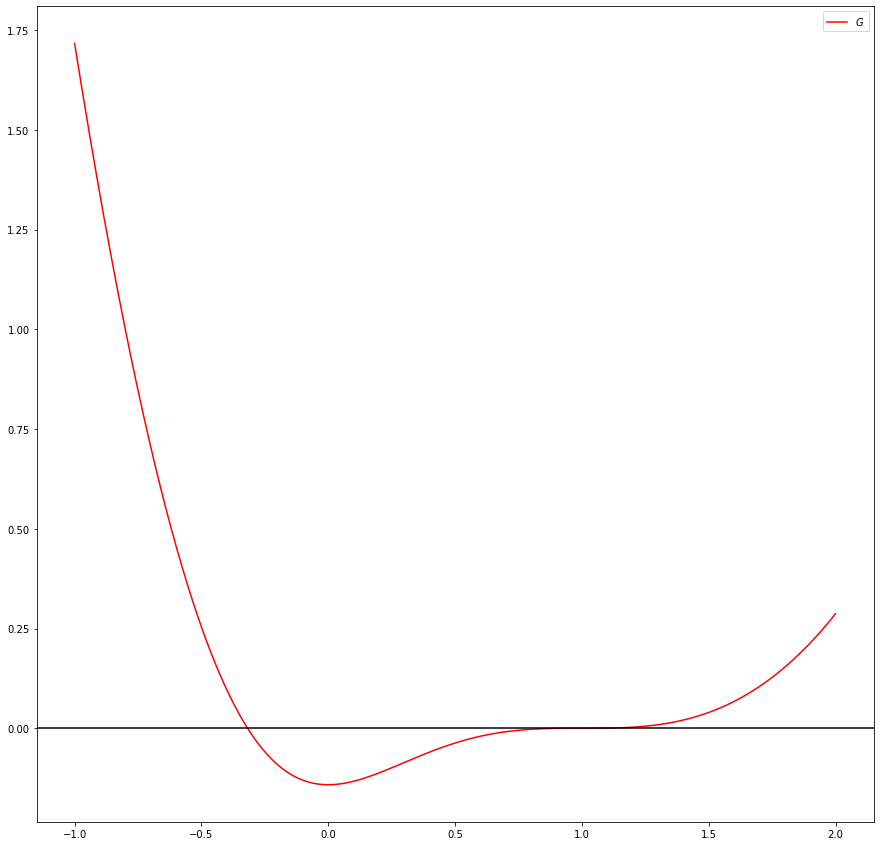

In [36]:
#построим интересующий нас график
x_data = np.linspace(-1, 2, 1000)

fig, axs = plt.subplots(1, 1, figsize = (15, 15))

axs.plot(x_data, G(x_data), label = '$G$', color = 'red')

axs.legend()

axs.axhline(y = 0, color = 'k')

Видно, что уравнение имеет 2 корня. Один - на отрезке $[-0.5, 0]$ - имеет кратность 1, второй - корень, приближённо равный 1 - имеет кратность 3.
Покажем, что корень $ x = 1 $ действительно имеет кратность 3. Введём функции .

In [37]:
def G1(x):
    return G(x) / (x - 1) ** 2 

def G2(x):
    return G(x) / (x - 1) ** 3

<ipython-input-35-abe51f885339>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 4 * np.arctan((x - 1) / (x + 1)) - 4 * x + x**2 + 3
<ipython-input-37-5b70ef29169c>:2: RuntimeWarning: invalid value encountered in true_divide
  return G(x) / (x - 1) ** 2
<ipython-input-35-abe51f885339>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 4 * np.arctan((x - 1) / (x + 1)) - 4 * x + x**2 + 3
<ipython-input-37-5b70ef29169c>:5: RuntimeWarning: invalid value encountered in true_divide
  return G(x) / (x - 1) ** 3


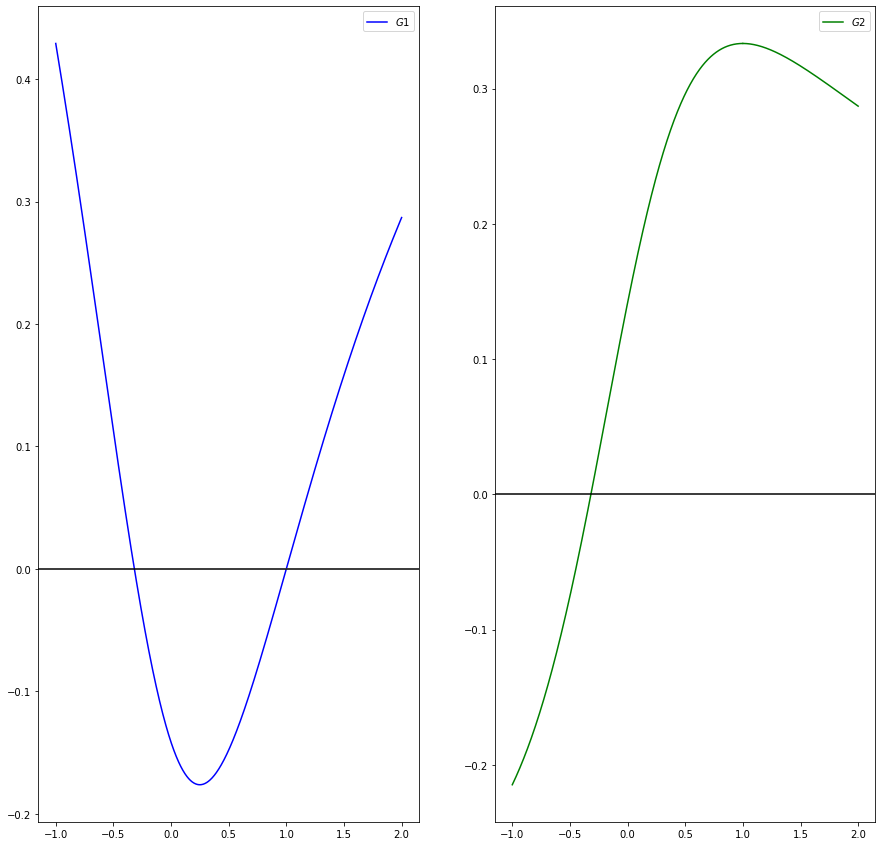

In [38]:
fig, axs = plt.subplots(1, 2, figsize = (15, 15))

axs[0].plot(x_data, G1(x_data), label = '$G1$', color = 'blue')
axs[1].plot(x_data, G2(x_data), label = '$G2$', color = 'green')

axs[0].legend()
axs[1].legend()

axs[0].axhline(y = 0, color = 'k')
axs[1].axhline(y = 0, color = 'k')

Из графиков видим, что после деления функции G на многочлен $ (x - 1)^3 $, приближённый к 1 корень перестаёт быть корнем уравения.

С помощью метода Ньютона для кратных корней определим приближённые корни уравнения.

In [42]:
# k - кратность корня
eps = 10 ** (-10)
def Newtone_k (x0, k): 
    i = 0
    x1 = x0 - (k * G(x0)) / dG(x0) 
    while np.abs(x1 - x0) >= eps:
        x0 = x1
        x1 = x0 - (k * G(x0)) / dG(x0)
        i += 1
    return (x1, i)

In [43]:
Newtone_k(-0.2, 1)

(-0.31801926497285377, 5)

In [44]:
Newtone_k(1.1, 3)

(0.9999999999194035, 2)

$ \textbf{Отчёт по заданию} $ : Отыскали корни уравнения с учётом определённой по графикам кратности с использованием модифицированного метода Ньютона для кратных корней. Метод показал высокую быстроту сходимости для кратного корня - он нашёл его за 2 итерации. Для кратных корней такой модифицированный метод имеет квадратичную скорость сходимости, тогда как стандартный метод Ньютона для кратных корней имеет линейную скорость сходимости.